##OLS practice 1


In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing

In [9]:
dataset = fetch_california_housing()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [12]:
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data['PRICE'] = dataset.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
X = data.drop('PRICE', axis=1)
y = data['PRICE']

In [14]:
X = sm.add_constant(X)

In [15]:
model = sm.OLS(y, X)
results = model.fit()

In [16]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):               0.00
Time:                        07:42:46   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

After cleaning p-value > 0.05

In [17]:
X = data.drop(['PRICE', 'Population'], axis=1)
y = data['PRICE']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4538.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):               0.00
Time:                        07:45:38   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.526e+04
Df Residuals:                   20632   BIC:                         4.533e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9175      0.658    -56.085      0.0

##OLS practice with kaggle dataset


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

data = pd.read_csv('true_car_listings.csv')
data.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [24]:
data.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


We can already see if our data is normally distributed but has some distortion. First compare mean with median(50 % percentile). We see that median is left that mean, so it means that our graph will be left that mean. Next, we know that mean +- std gives 66%. Here it is also not true, so our grap will be more higher and narrow.

<Axes: >

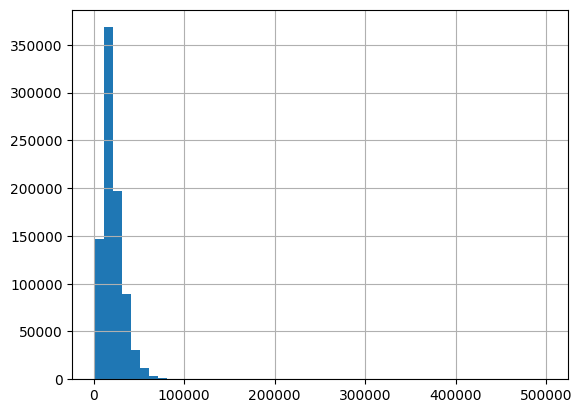

In [25]:
data.Price.hist(bins = 50)

but it is still normally distributed


<Axes: >

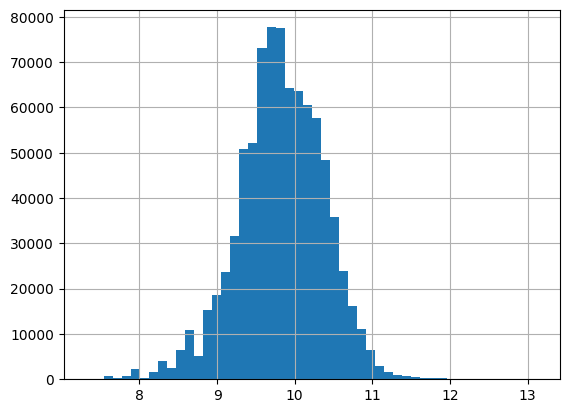

In [27]:
np.log(data.Price).hist(bins = 50)

with log we wider our graph, it compresses our data

In [28]:
for col in data.columns:
  print(f'Predictor {col}\nNumber of Unique Values {data[col].sort_values().unique()}')

Predictor Price
Number of Unique Values [  1500   1511   1527 ... 469991 490000 499500]
Predictor Year
Number of Unique Values [1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018]
Predictor Mileage
Number of Unique Values [      5       6       7 ... 2137327 2457832 2856196]
Predictor City
Number of Unique Values ['AKRON' 'ALEXANDRIA' 'AURORA' ... 'phoenix' 'salt lake' 'victorville']
Predictor State
Number of Unique Values [' AK' ' AL' ' AR' ' AZ' ' Az' ' CA' ' CO' ' CT' ' Ca' ' DC' ' DE' ' FL'
 ' Fl' ' GA' ' Ga' ' HI' ' IA' ' ID' ' IL' ' IN' ' KS' ' KY' ' LA' ' MA'
 ' MD' ' ME' ' MI' ' MN' ' MO' ' MS' ' MT' ' Md' ' NC' ' ND' ' NE' ' NH'
 ' NJ' ' NM' ' NV' ' NY' ' OH' ' OK' ' OR' ' Oh' ' PA' ' RI' ' SC' ' SD'
 ' TN' ' TX' ' UT' ' VA' ' VT' ' Va' ' WA' ' WI' ' WV' ' WY' ' ga']
Predictor Vin
Number of Unique Values ['04WT3N56GG0646582' '04WT3N59GG1261202' '137FA84322E198163' ...
 'ZN661YUS7HX230573' 'ZN661YUS8HX230520' 'ZN661YUS

In [29]:
data.Make.value_counts()

,count
Make,
Ford,110432
Chevrolet,102268
Toyota,77786
Nissan,66250
Honda,50193
Jeep,40373
Hyundai,35837
Dodge,34368
BMW,32415


In [32]:
data['NumOfYears'] = 2018 - data['Year']

bmw_models = data[data['Make'] == 'BMW']['Model'].value_counts()[:34].index
bmw_models

Index(['3', '5', '4', 'X3xDrive28i', '7', 'X5xDrive35i', 'X5AWD', '6',
       'X1xDrive28i', 'i3Hatchback', 'X3AWD', '2', 'X1sDrive28i', '1',
       'X3sDrive28i', 'X3xDrive35i', 'X5xDrive50i', 'X5sDrive35i',
       'X5xDrive35d', 'X6xDrive35i', 'X1Sports', 'X4xDrive28i', 'X1xDrive35i',
       'Z4Roadster', 'X6AWD', 'Z42dr', 'M32dr', 'Z4sDrive28i', 'X1xDrive',
       'Z4sDrive35i', 'M5Sedan', 'X5', 'X3xDrive28d', 'M4Coupe'],
      dtype='object', name='Model')

In [34]:
bmw_data = data[(data['Make'] == 'BMW') & (data['Model'].isin(bmw_models))]
bmw_data

,Price,Year,Mileage,City,State,Vin,Make,Model,NumOfYears
24246,10995,2011,10000,SPRING VALLEY,CA,WBAPH5G52BNM82026,BMW,3,7
24247,14299,2014,25858,Las Vegas,NV,WBA3B1G58ENS77078,BMW,3,4
24248,11988,2011,30000,Duluth,GA,WBAPK7C57BF087014,BMW,3,7
24249,10999,2011,45078,Miami Gardens,FL,WBAPH7C56BE674180,BMW,3,7
24250,5991,2008,80185,Hollywood,FL,WBAVB77568NH78036,BMW,3,10
...,...,...,...,...,...,...,...,...,...
56656,54995,2014,23964,Honolulu,HI,WBAYP1C5XED216236,BMW,6,4
56657,39900,2014,33337,Hollywood,FL,WBALW3C52EC892808,BMW,6,4
56658,58621,2017,3040,Athens,GA,WBA4U7C3XH5H20134,BMW,4,1
56659,58000,2015,11835,Louisville,KY,WBA6B4C52FD760545,BMW,6,3


In [36]:
bmw_data['Model'].value_counts()

,count
Model,
3,11131
5,5348
4,2404
X3xDrive28i,1615
7,1460
X5xDrive35i,1237
X5AWD,1220
6,947
X1xDrive28i,757


In [39]:
pd.get_dummies(bmw_data['Model']).replace(False, 0).replace(True, 1)

<ipython-input-39-18659c0374ef>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pd.get_dummies(bmw_data['Model']).replace(False, 0).replace(True, 1)


,1,2,3,4,5,6,7,M32dr,M4Coupe,M5Sedan,...,X5xDrive35d,X5xDrive35i,X5xDrive50i,X6AWD,X6xDrive35i,Z42dr,Z4Roadster,Z4sDrive28i,Z4sDrive35i,i3Hatchback
24246,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24247,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24248,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24249,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24250,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56657,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56658,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56659,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X = bmw_data[['NumOfYears', 'Mileage']]
y = bmw_data['Price']

In [42]:
X = sm.add_constant(X)

model = sm.regression.linear_model.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                 2.767e+04
Date:                Tue, 18 Mar 2025   Prob (F-statistic):               0.00
Time:                        08:35:59   Log-Likelihood:            -3.2890e+05
No. Observations:               31991   AIC:                         6.578e+05
Df Residuals:                   31988   BIC:                         6.578e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.087e+04     72.180    566.165      0.0

In [43]:
model = sm.regression.linear_model.OLS(np.log(y), X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                 5.287e+04
Date:                Tue, 18 Mar 2025   Prob (F-statistic):               0.00
Time:                        08:40:58   Log-Likelihood:                -587.16
No. Observations:               31991   AIC:                             1180.
Df Residuals:                   31988   BIC:                             1205.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7630      0.003   4270.981      0.0

This is now Log-Lin so every 1 change in X results in 100% * coef change on y. For example NumOfYears = -0.0805. So, every year decreases the price for 8%. If our car is 3 years old, its price is less to 24%